# Импорт библиотек

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st


np.random.seed(123)

# Нормальное распределение

Нормальное распределение - унимодальное (имеющее одну моду) и симметричное распределение, в котором отклонение от средних подчиняется определенному закону:
* 68.2% наблюдений расположены в диапазоне +-1сигма
* 95.4% наблюдений находятся в диапазоне +-2 сигмы и тд

In [3]:
mu = 0
sigma = 1
norms = np.random.normal(loc=mu, scale=sigma, size=10000)

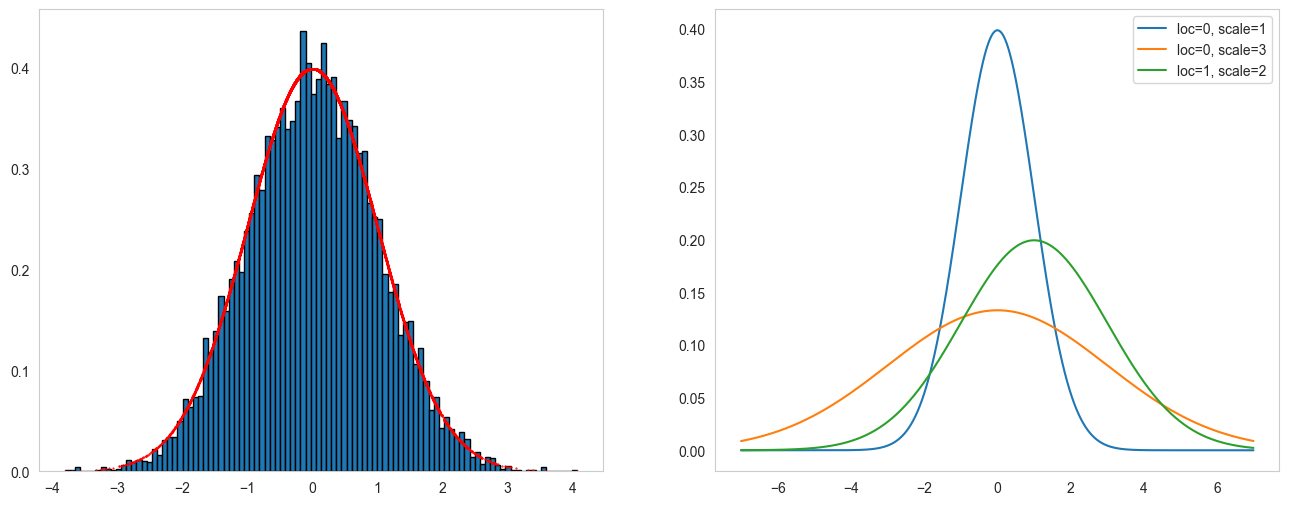

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.hist(norms, bins=100, density=True, ec='k');
ax1.grid(False)
ax1.plot(norms, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (norms - mu)**2 / (2 * sigma**2) ), '.r', markersize=1);

x = np.arange(-7, 7, 0.01)
ax2.plot(x, st.norm.pdf(x, loc=0, scale=1), label='loc=0, scale=1');
ax2.plot(x, st.norm.pdf(x, loc=0, scale=3), label='loc=0, scale=3');
ax2.plot(x, st.norm.pdf(x, loc=1, scale=2), label='loc=1, scale=2');
ax2.legend();
ax2.grid(False)

# Z-стандартизация

По умолчанию любое распределение, как правило, смещено относительно нуля и имеет стандартное отклонение, отличное от 1. Но для исследований бывает полезно отмасштабировать данные так, чтобы среднее и станартное отклонение стали равны 0 и 1 соответственно. Такое преобразование называется z-стандартизацией. Оно выполняется по следующей формуле

$$ \large z _i = \frac{x _i - \mu}{\sigma}   $$

Для распределения нужно рассчитать среднее и стандартное отклонение, а затем из каждого числа вычесть среднее и поделить эту разницу на стандартное отклонение

In [5]:
dist = np.random.uniform(-2, 15, 1000)
mu = np.mean(dist)
sigma = np.std(dist)

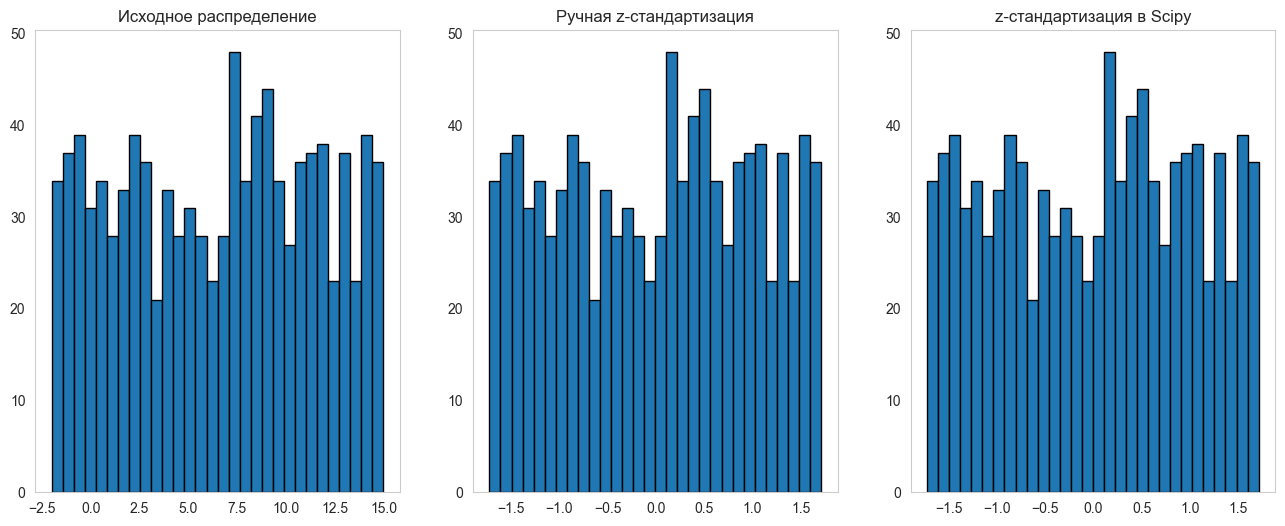

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))

ax1.set_title('Исходное распределение')
ax1.hist(dist, bins=30, ec='k');
ax1.grid(False)

ax2.set_title('Ручная z-стандартизация')
ax2.hist([(item-mu)/sigma for item in dist], bins=30, ec='k')
ax2.grid(False);

ax3.set_title('z-стандартизация в Scipy')
ax3.hist(st.zscore(dist), bins=30, ec='k')
ax3.grid(False);

**Вывод**

Стандартное отклонение не меняет форму распределения, но приводит срднее к нулю и стандартное отклонение к единице

Прикладной смысл z-стандартизации применительно к нормально распределенным величинам такой: зная параметры распределения, мы можем оценить, какой процент наблюдений не превышает определенную величину.

Пример:
Пусть дано распределение (и известно, что оно **нормальное**) роста людей heights. Нужно оценить вероятность встретить человека с ростом более 190 см

In [34]:
q = 195
mu = 170
sigma = 15
heights = np.random.normal(loc=mu, scale=sigma, size=1000)
height_prob = st.norm.pdf(sorted(heights), loc=np.mean(heights), scale=np.std(heights))

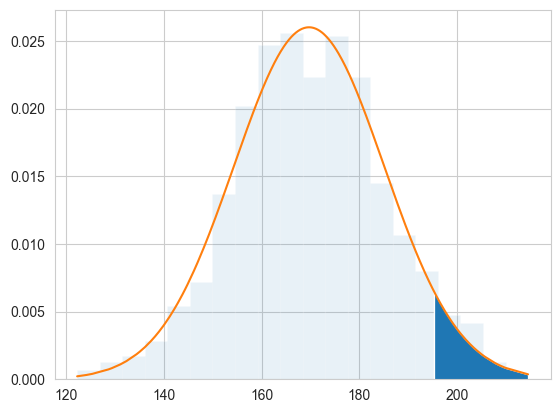

In [35]:
fig, ax1 = plt.subplots(1, 1)
ax1.hist(heights, bins=20, density=True, ec='w', alpha=0.1);
ax1.plot(sorted(heights), height_prob);
ax2 = plt.fill_between(np.sort(heights), 0, height_prob, where=np.sort(heights)>q)

Переведем искомую границу в z-шкалу и найдем площадь закрашенного участка под кривой

In [9]:
print(f'Рост {q} отклоняется от среднего на {(q-mu) / sigma:.2f} стандартных отклонений')
print(f'Вероятность встретить человека выше {q} см составляет {1-st.norm.cdf((q-mu) / sigma):.2%}')

Рост 195 отклоняется от среднего на 1.67 стандартных отклонений
Вероятность встретить человека выше 195 см составляет 4.78%


Аналогично можно решать задачи определения двусторонней вероятности (выше 195 см, но ниже 150) или наоборот (от 150 до 195)

# Центральная предельная теорема

Имеем генеральную совокупность, распределенную **как угодно**. Посмотрим на его среднее и стандартное отклонение

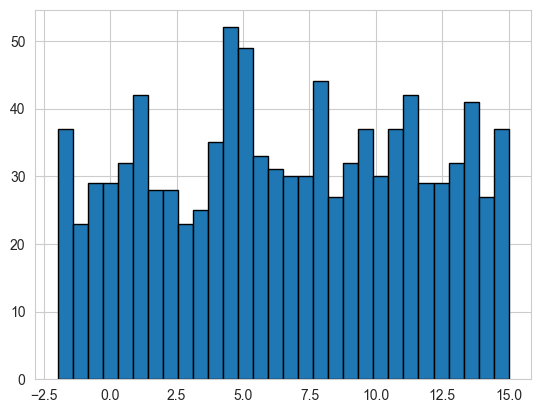

In [10]:
dist = np.random.uniform(-2, 15, 1000)
plt.hist(dist, bins=30, ec='k');

In [11]:
print(f'Среднее {np.mean(dist):.2f}, Стандартное отклонение: {np.std(dist):.2f}')

Среднее 6.67, Стандартное отклонение: 4.83


Начнем извлекать выборки достаточно большого размера (больше 30) и фиксировать их среднее и стандартное отклонение

In [12]:
means = []
for i in range(1000):
    sample = np.random.choice(dist, size=50)
    if i<5:
        print(f'Среднее {np.mean(sample):.2f}, Стандартное отклонение: {np.std(sample):.2f}')
    means.append(np.mean(sample))

Среднее 6.37, Стандартное отклонение: 4.78
Среднее 7.08, Стандартное отклонение: 4.97
Среднее 6.11, Стандартное отклонение: 4.70
Среднее 6.34, Стандартное отклонение: 4.40
Среднее 6.36, Стандартное отклонение: 4.76


Средние и стандартные отклонения похожи на параметры "генеральной совокупности". Посмотрим на гистограмму распределения средних, а также нанесем на нее среднее генеральной совокупности

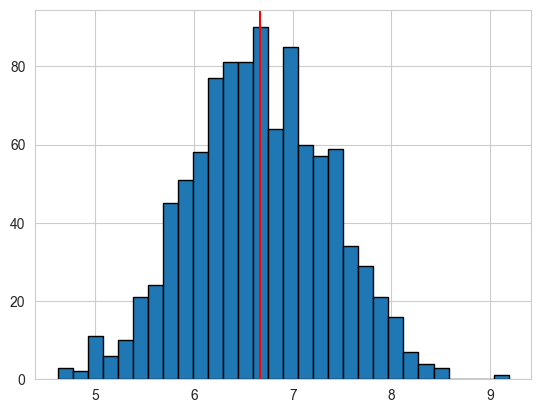

In [13]:
plt.hist(means, bins=30, ec='k');
# plt.plot(np.random.normal(loc=np.mean(dist), scale=np.std(dist), size=1000))
plt.axvline(np.mean(dist), color='red');

Это и есть центральная предельная теорема: если из любой генеральной совокупности извлекать выборки достаточно большого объема, то их средние распределятся нормально вокруг среднего генеральной совокупности. Стандартное отклонение этого распределения называют стандартной ошибкой SE и вычисляют по формуле

$$ \large SE=\frac{\sigma}{\sqrt{n}}    $$

где σ - стандартное отклонение генеральной совокупности. n - число наблюдений в каждой выборке. Тут важно оговориться, что, строго говоря, стандартного отклонения генеральной совокупности у нас нет, но в данном случае при условии большого количества наблюдений этим можно пренебречь и использовать стандартное отклонение выборок (они близки). А в дальнейших темах это допущение будет разрешено.

Теперь выведем одно очень важное следствие ЦПТ

1. Нанесем на график несколько "предполагаемых" распределений среднего ГС, построенных по параметрам выборок (черные кривые на рис. 1)
2. Добавим к графику реальное распределение полученных выборочных средних (красная кривая), будем называть его метараспределение. а также истинное среднее генеральной совокупности (синяя вертикальная линия)
3. Что видно из графиков:
* Среднее метараспределения совпадает со средним генеральной совокупности
* Все распределения на графике имеют ~одинаковое стандартное отклонение
4. Оставим на графике (рис. 2) только метараспределение и распределение, построенное по нашему предположению о среднем, назовем его для краткости просто распределение. Помним, что среднее генеральной совокупности находится в среднем метараспределения.
5. Так как распределения эквивалентные, то можно сформулировать две эквивалентные задачи
* Определить вероятность встретить среднее распределения в метараспределении
* Определить вероятность встретить среднее метараспределения в распределении

Последний пункт и является очень важным практическим следствием ЦПТ. Согласно нему, достаточно из ГС извлечь одну выборку и по ней с определенной вероятностью узнать среднее генеральной совокупности.

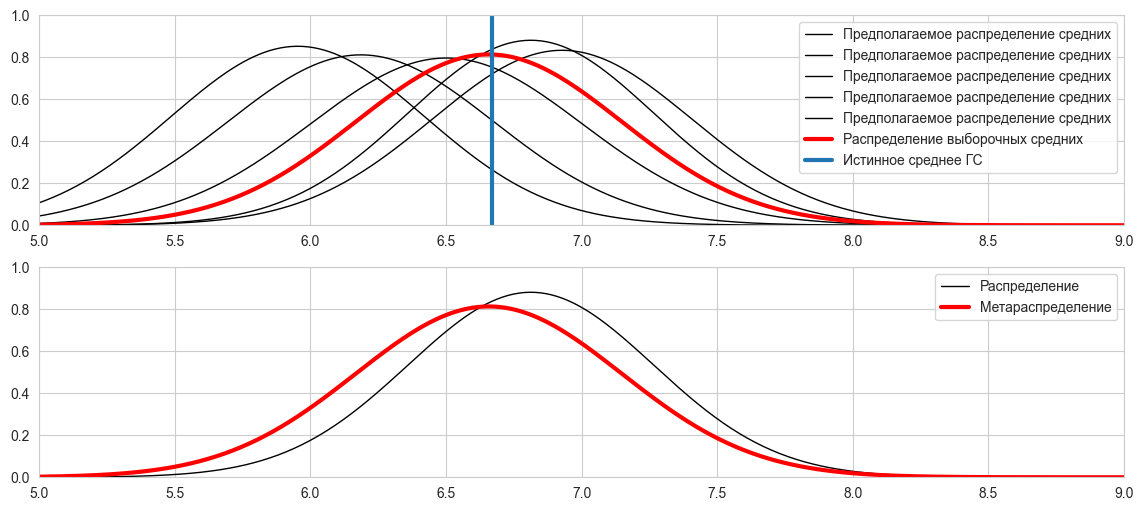

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6))

x = np.arange(-2, 15, 0.01)
means = []
for i in range(999):
    n = 100
    sample = np.random.choice(dist, size=n)
    means.append(np.mean(sample))
    if i>993:
        ax1.plot(x, st.norm.pdf(x, loc=np.mean(sample),
                                   scale=np.std(sample)/np.sqrt(n)), color='k', linewidth=1, label='Предполагаемое распределение средних');

ax1.plot(x, st.norm.pdf(x, loc=np.mean(means), scale=np.std(means)), color='red', linewidth=3, label='Распределение выборочных средних');
ax1.axvline(np.mean(dist), linewidth=3, label='Истинное среднее ГС')

ax1.set_xlim([5, 9]);
ax1.set_ylim([0, 1]);
ax1.legend();

ax2.plot(x, st.norm.pdf(x,
                        loc=means[-1],
                        scale=np.std(sample)/np.sqrt(n)), color='k', linewidth=1, label='Распределение');
ax2.plot(x, st.norm.pdf(x, loc=np.mean(means), scale=np.std(means)), color='red', linewidth=3, label='Метараспределение');
ax2.set_xlim([5, 9]);
ax2.set_ylim([0, 1]);
ax2.legend();
ax2.legend();

Пользуясь выведенным следствием из ЦПТ, можно строить доверительные интервалы для истинного среднего генеральной совокупности

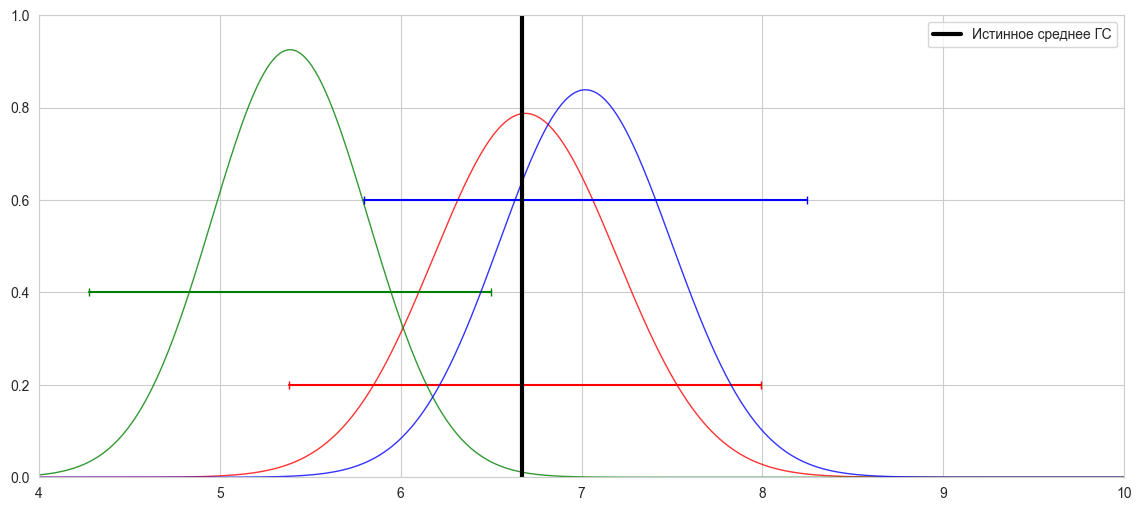

In [180]:
fig, ax1 = plt.subplots(1, 1, figsize=(14, 6))
conf = 0.99

x = np.arange(-2, 15, 0.01)

for i, c, height in zip(range(3), ('r', 'g', 'b'), (0.2, 0.4, 0.6)):
    n = 100
    sample = np.random.choice(dist, size=n)

    ax1.plot(x, st.norm.pdf(x, loc=np.mean(sample),
                               scale=np.std(sample)/np.sqrt(n)), color=c, alpha=0.8, linewidth=1);
    min, max = st.norm.interval(conf, loc=np.mean(sample), scale=np.std(sample)/np.sqrt(n))
    ax1.plot((min, max), (height, height), '|-', color=c)


ax1.axvline(np.mean(dist), linewidth=3, label='Истинное среднее ГС', color='k')

ax1.set_xlim([4, 10]);
ax1.set_ylim([0, 1]);
ax1.legend();

Выражение "95% доверительный интервал" означает, что 95% выборочных средних будут находиться в найденном интервале. Как  ищется этот интервал:
* Для имеющейся выборки ищется такое z-значение, чтобы в интервале ±z*σ находилось 95% всех выборочных средних
* От среднего выборки откладывается z*σ вправо и влево. Это и есть доверительный интервал
* Разумеется, можно строить и другие доверительные интервалы. Например, 99% доверительный интервал будет шире, чем 95%-ый, и на каждые сто выборок будет попадаться всего одна, чье среднее в этот интервал попадать не будет